总结参见：
https://www.cnblogs.com/onepixel/articles/7674659.html

# 插入排序

插入排序始终维持一侧有序，读取无序数据插入其中。

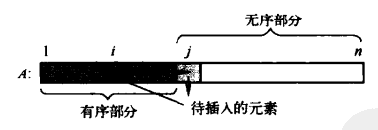

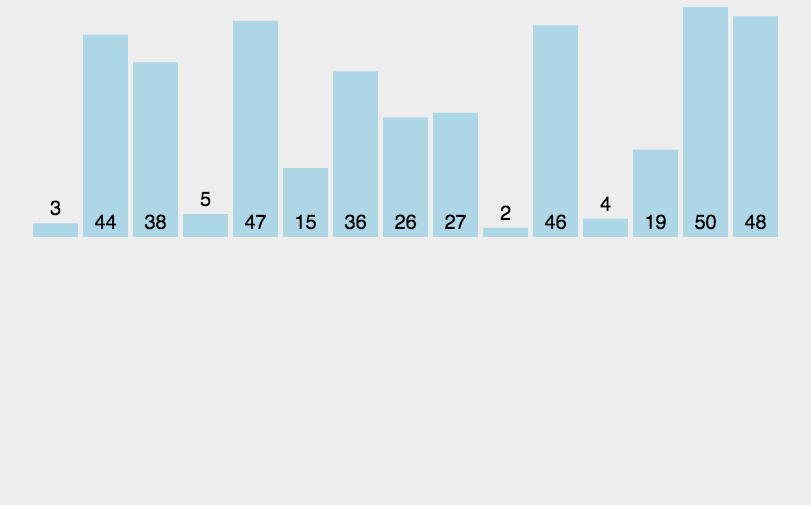

In [23]:
# 关于range的逆序遍历
for i in range(5, -1, -1):
    print(i)

# 由于遵循左闭右开的原则，从(5, -1)可以得到:

5
4
3
2
1
0


In [24]:
def INSERTION_SORT(A):
    # 将数组遍历，每一个数都作为key
    for i in range(1, len(A)): # 第一次不用
        key = A[i]
        # 将key与之前所有元素比较
        for j in range(i-1, -1, -1):
            if A[j] > key:
            # 每次向右移动一次，腾出一个格子，预留给可能插入的key
                A[j+1] = A[j]
            else:
            # 找到第一个比key小(或等于)的值后break
            # 此后将这个数的下一个变为key
            # 当所有值都小于key时，即保持不变时，将key重新更新为key
                break
        A[j+1] = key
    
    return A
        
INSERTION_SORT([2,5,3,8,5,1,0])

[2, 0, 1, 3, 5, 5, 8]

可见这样的写法不能将最左侧的2考虑进来。这或许是因为range()本身无法适应这种情况。

我们希望通过比较得到第一个小于key的下标，如果左侧全都比key(A[i])小，则返回j=i-1。  
若左侧全都比key大，则我们希望得到j=-1，而range是做不到的。  
range无法区分“所有循环都不满足条件”和“最后一次循环中遇到break”。
这导致了怎么都无法优雅的完成目标，以上写法中无论最后一次循环的结果如何，j都会变成0。
如果我们改变循环数字，变成从\[i-2,-2)，再倒数第二次循环中会判定第一个数是否大于key，如果大于，则进入最后一次循环，j=-1，否则break，j=0  
但是下标就有可能取到-1，这是不安全的。（不过在这个问题中是可以的因为A[j+1]会被覆盖）

解决方法：
为了安全性我们可以给循环之中添加if，但这回增加操作，显得不优雅。
或者使用while。

In [25]:
def INSERTION_SORT(A):
    # 将数组遍历，每一个数都作为key
    for i in range(1, len(A)): # 第一次不用
        key = A[i]
        # 将key与之前所有元素比较
        j = i - 1
        while j > -1:
            if A[j] > key:
            # 每次向右移动一次，腾出一个格子，预留给可能插入的key
                A[j+1] = A[j]
            else:
            # 找到第一个比key小(或等于)的值后break
            # 此后将这个数的下一个变为key
            # 当所有值都小于key时，即保持不变时，将key重新更新为key
                break
            j -= 1
        A[j+1] = key
    
    return A
        
INSERTION_SORT([2,5,3,8,5,1,0])

[0, 1, 2, 3, 5, 5, 8]

我们可以修改一下使之更加优雅：

In [27]:
def INSERTION_SORT(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j > -1 and A[j] > key:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key
    
    return A
        
INSERTION_SORT([2,5,3,8,5,1,0])

[0, 1, 2, 3, 5, 5, 8]

# 冒泡排序

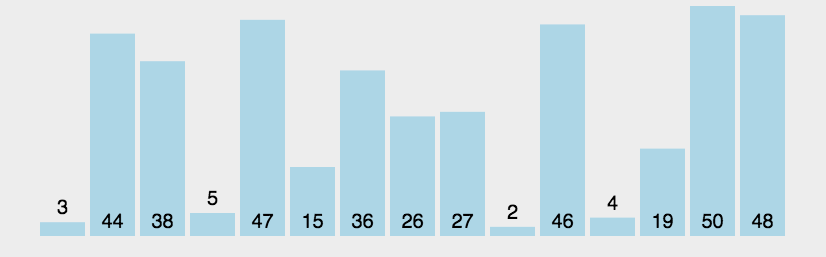

In [5]:
def BUBBLE_SORT(A):
    # 每次比较两个位置的大小，i和i+1
    # 第一次循环i的最后位置，第一遍要比较到倒数第二个数字len(A)-2(因为逆序左闭右开，所以需要-2)
    # 最后一次比较第一个位置
    for i in range(len(A)-2, -1, -1):
        # 第二层循环0到i的两两比较
        for j in range(i+1):
            if A[j] > A[j+1]:
                temp = A[j]
                A[j] = A[j+1]
                A[j+1] = temp
    return A

BUBBLE_SORT([2,5,3,8,5,1,0])

[0, 1, 2, 3, 5, 5, 8]

两点经验：  
1 逆序遍历需要考虑左闭右开  
2 在第二层得到下标后，如果遍历从0到这个下标的所有，则需要range(i+1)

# 归并排序

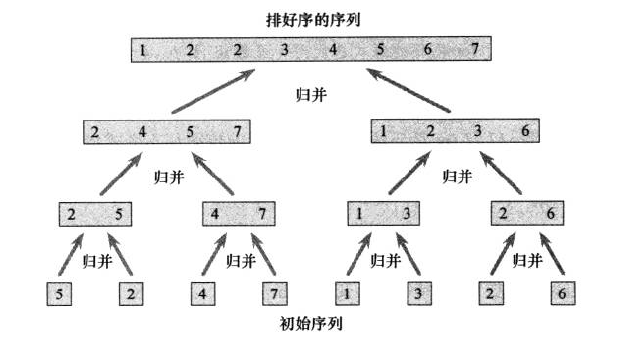

In [4]:
A = [1, 2, 3, 4, 5]
L = len(A)
L_2 = int(L/2)
A[:L_2], A[L_2:L]

([1, 2], [3, 4, 5])

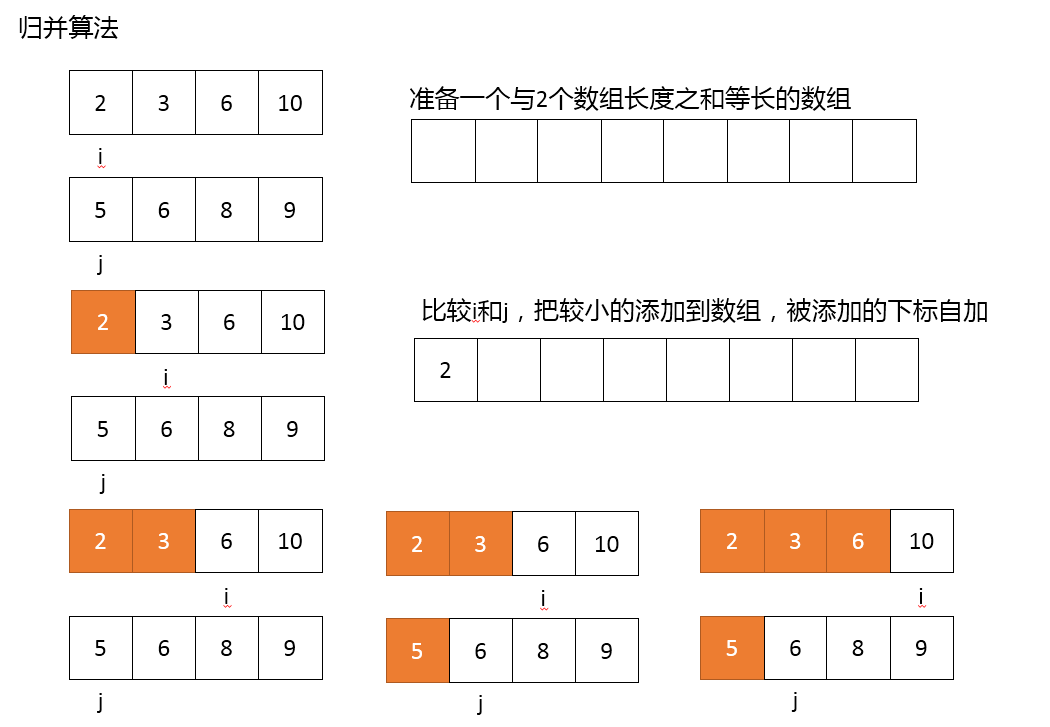

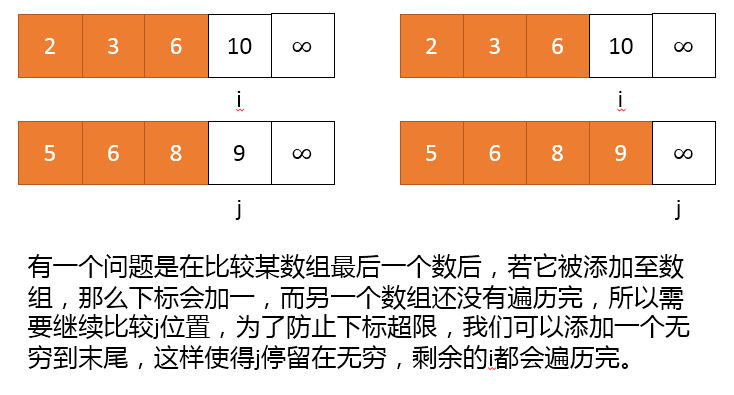

In [8]:
def MERGE_SORT(A):
    # 这是一个递归算法，分为3个步骤
    L = len(A)
    
    # 递归边界
    if L == 1:
        return A
    
    # 分解，将数组一分为二
    # 每一个部分都递归调用本函数
    A1 = MERGE_SORT(A[:int(L/2)])
    A2 = MERGE_SORT(A[int(L/2):L])
    
    # 合并
    # 归并算法，交互的更改哨兵，另一数组的小于哨兵的值都依次被添加
    r = []
    i, j = 0, 0
    A1.append(float("inf"))
    A2.append(float("inf"))
    while i + j < len(A1)-1 + len(A2)-1:
        if A1[i] < A2[j]:
            r.append(A1[i])
            i += 1
        else:
            r.append(A2[j])
            j += 1
    return r
   
MERGE_SORT([2,5,3,8,5,1,0])

[0, 1, 2, 3, 5, 5, 8]